In [3]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

import numpy as np
from os.path import join
import os

Using TensorFlow backend.


In [16]:
region = 'mixco_3'
roof_dir = join('..', '..', 'data', region, 'roofs')
materials = {'healthy_metal':0, 'irregular_metal':1, 'concrete_cement':2, 'incomplete':3, 'other':4}

### Calculate features

This uses a pretrained network to compute features from the images, which are later classified.
First, load the model, from which we remove the top layer

In [17]:
model = ResNet50(weights='imagenet', include_top=False, pooling='max')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

Traverse all images in their corresponding folders which indicate the material and use `model.predict()` to get the features.

In [18]:
# Count the number of roofs
nof_roofs = 0;
for material in materials.keys():
    material_fp = join(roof_dir, material)
    nof_this = len([name for name in os.listdir(material_fp) if os.path.isfile(join(material_fp, name))])
    nof_roofs = nof_roofs + nof_this

labels = []
resnet50_feature_matrix = np.zeros((nof_roofs, 2048), dtype=float)

# Walk through all images
i = 0;
for material in materials.keys():
    material_fp = join(roof_dir, material)
    for root, dirs, files in os.walk(material_fp):
        for file in files:
            img_fp = join(material_fp, file)
            label = materials[material]
            labels.append(label)
            print(img_fp, "labeled as ", material, ":", label)
            
            # Pad if size is too small, preprocess
            img = image.load_img(img_fp, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)
            
            # Compute features 
            resnet50_feature = model.predict(img_data)
            resnet50_feature_np = np.array(resnet50_feature)
            resnet50_feature_matrix[i] = resnet50_feature_np.flatten()
            i = i + 1

..\..\data\mixco_3\roofs\healthy_metal\7a1ea402.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a1ec590.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a1f387c.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a1f5d2a.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a1fb914.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a206832.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a2176f0.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a2246c0.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a237ca2.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a239db8.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a243732.tif labeled as  healthy_metal : 0
..\..\data\mixco_3\roofs\healthy_metal\7a24afdc.tif labeled as  healthy_metal : 0
..\..\data\mixco

..\..\data\mixco_3\roofs\concrete_cement\7a1d9206.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a1ea9c0.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a1ed850.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a1f5cc6.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a1fc2ba.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a2047e4.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a244a56.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a253c22.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a2540c8.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a25fdec.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a262b96.tif labeled as  concrete_cement : 2
..\..\data\mixco_3\roofs\concrete_cement\7a2689d8.tif 

In [19]:
unique, index, count = np.unique(resnet50_feature_matrix,
                                 axis = 0,
                                 return_index=True,
                                 return_counts=True)

In [20]:
index.sort()
print(index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157]


In [21]:
import pickle
from os import makedirs
from os.path import exists

pickle_path = join('..', '..', 'pickles')
if not exists(pickle_path):
    makedirs(pickle_path)

with open(join(pickle_path, 'resnet50_feature_matrix_' + region + '.pkl' ), 'wb') as f:
    pickle.dump(resnet50_feature_matrix, f)
with open(join(pickle_path, 'labels_' + region + '.pkl' ), 'wb') as f:
    pickle.dump(np.asarray(labels), f)

### Visualize the features

Reduce the dimensionality to 2D using tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib inline

In [23]:
def plot_tSNE(features, labels=None, number_of_materials=5):
    if labels is None:
        labels = np.zeros((features.shape[0]))

    # Visualization_
    #pca_object = PCA(n_components=50)
    #pca_features = pca_object.fit_transform(features)
    tsne_features = TSNE(n_components=2).fit_transform(features)

    # define the colormap
    cmap = plt.cm.jet
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(0, number_of_materials, number_of_materials + 1)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    
    print(tsne_features.shape)
    
    # Plot D-Vectors
    plt.figure()
    scat = plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap=cmap, norm=norm)
    cb = plt.colorbar(scat, spacing='proportional', ticks=bounds)

(158, 2)


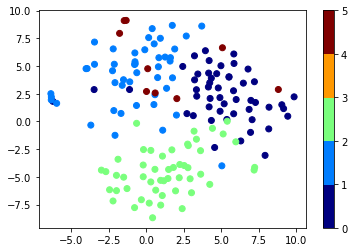

In [24]:
plot_tSNE(resnet50_feature_matrix, labels)